**Collins Kibet**

Spring 2021

CS 251: Data Analysis and Visualization

Project 7: Radial Basis Function Neural Networks - Extensions

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Visualize network predictions

1. Load in MNIST Dataset

In [2]:
# Load data here
x_train = np.load("data/mnist_train_data.npy")
y_train = np.load("data/mnist_train_labels.npy")
x_test = np.load("data/mnist_test_data.npy")
y_test = np.load("data/mnist_test_labels.npy")

2. Plot 5 by 5 grid with first 25 images and their training label as title


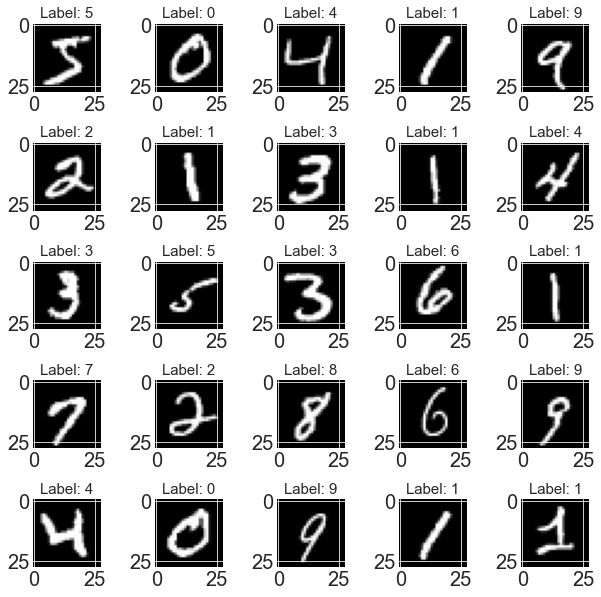

In [3]:
# 5x5 plot here
num = 25
images = x_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))

fig.subplots_adjust(wspace=0.75, hspace = 0.75)

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}', size = 15)
plt.show()

3. Train and test RBF network

In [4]:
from rbf_net import RBF_Net
from kmeans import KMeans

In [5]:
#flatten non_leading dimensions of train and test sets
def flatten(data):
    data_flat = data.reshape(data.shape[0], (data.shape[1]*data.shape[2]))
    
    data_norm = (data_flat - data_flat.min())/ (data_flat.max() - data_flat.min())
    
    return data_norm

mnist_train = flatten(x_train)
mnist_test = flatten(x_test)

In [7]:
#Train a RBF network on MNIST
mnist_net = RBF_Net(50,10)

#train neural net
#intialize method on training data
mnist_net.initialize(mnist_train[0:1500])

#train rbf_net
mnist_net.train(mnist_train[0:1500,:], y_train[0:1500])

In [8]:
# train acc
train_acc = mnist_net.accuracy(y_train[0:1500], mnist_net.predict(mnist_train[0:1500,:]))

print(f'MNIST_Train accuracy : {train_acc : .2f}')

MNIST_Train accuracy :  0.86


In [9]:
#predicted classes in training
y_pred_train = mnist_net.predict(mnist_train[0:1500,:])

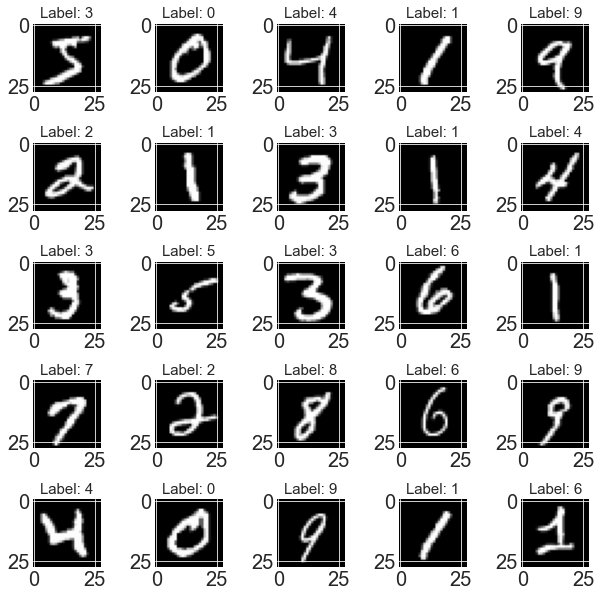

In [10]:
#Display predicted labels for first 25 images in training dataset
# 5x5 plot here
num = 25
images = x_train[:num]
labels = y_pred_train[:num]

num_row = 5
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))

fig.subplots_adjust(wspace=0.75, hspace = 0.75)

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}', size = 15)
plt.show()

From the plot above, we can see that in the first 25 images in the training data, one point is misclassified. The image in (row 5,column 5) is labeled as 5 and it's clearly a one.

4. Visualize labels in test data.

In [11]:
# test acc
test_acc = mnist_net.accuracy(y_test[0:1500], mnist_net.predict(mnist_test[0:1500,:]))

print(f'MNIST_Test accuracy : {test_acc : .2f}')

MNIST_Test accuracy :  0.80


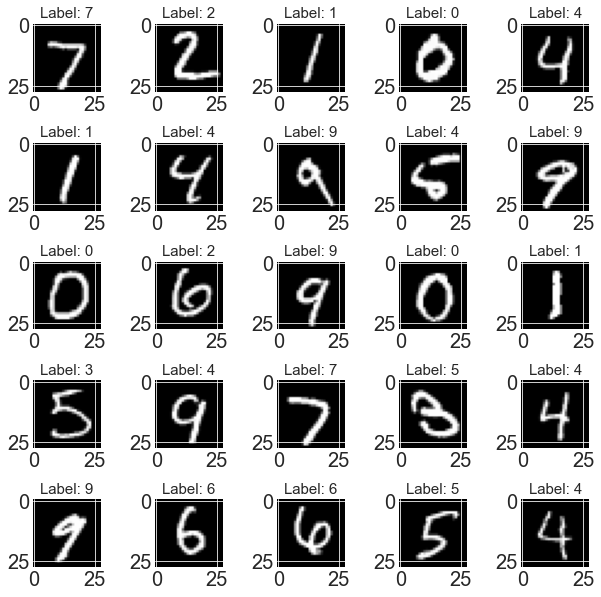

In [12]:
#testing data
y_pred_test = mnist_net.predict(mnist_test[0:1500,:])

#Display predicted labels for first 25 images in training dataset
# 5x5 plot here
num = 25
images = x_test[:num]
labels = y_pred_test[:num]

num_row = 5
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))

fig.subplots_adjust(wspace=0.75, hspace = 0.75)

for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}', size = 15)
plt.show()

Since the test accuracy is less than the training accuracy, we expect the number of misclassified images to be greater when running the rbf neural network on the test data than on the training data. For the first 25 images in the MNIST test data, 2 images are misclassified compared to only one when using the training data. Images at positions (4,2) and (2,4) are misclassified as 4 and 5 instead of 9 and 5 respectively

5. Confusion matrixes for the first 25 images for both training and testing data

In [13]:
from sklearn import metrics


In [14]:
conf_mat = metrics.confusion_matrix(y_train[0:1500], y_pred_train)

print('Confusion Matrix for Training Data:\n', conf_mat)

Confusion Matrix for Training Data:
 [[135   0   0   1   0   3   1   0   0   0]
 [  0 165   0   1   1   0   1   2   2   0]
 [  2   3 128   0   1   1   1   5   2   1]
 [  1   0   9 110   0  13   1   1   3   4]
 [  0   1   4   0 143   0   2   2   0   8]
 [  5   1   1  26   4  91   5   0   4   0]
 [  2   5   2   0   1   1 130   0   0   0]
 [  0   6   1   0   7   0   0 161   0   2]
 [  1   3   3   5   0   6   1   0 114   1]
 [  3   0   0   6  22   1   1   9   0 111]]


In [15]:
conf_mat = metrics.confusion_matrix(y_test[0:1500], y_pred_test)

print('Confusion Matrix for Testing Data:\n', conf_mat)

Confusion Matrix for Testing Data:
 [[118   0   2   0   0   1   4   0   1   0]
 [  0 175   0   1   0   1   1   0   1   0]
 [  1   1 145   2   1   0   4   9   8   1]
 [  0   0   9 115   1  14   3   7   5   0]
 [  1   4   0   0 126   0   5   1   1  29]
 [  5   0   1  19   6  88   6   2   8   2]
 [  4   1   2   0   4   3 117   0   0   0]
 [  0   6   8   0   2   0   0 129   0   5]
 [  1   2  11  11   5   7   4   6  89   4]
 [  1   1   1   2  37   0   2   7   1  92]]


From the confusion matrices, we can see that there more images in the testing data that are confused than in the training data. In the training data, 5 and 9 were the most confused numbers with a total of 44 and 39 misclassifications respectively while in the testing data, 5 and 8 were the most confused numbers with a total of 48 and 51 misclassifications respectively.